# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Jonathan Wuntu
- **Email:** wuntujoy@gmail.com
- **ID Dicoding:** weiss001

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 Di musim manakah penggunaan bike sharing per jam paling banyak digunakan?
- Pertanyaan 2 Apakah penggunaan bike sharing di tahun 2011 sampai Oktober 2012 dipengaruhi oleh temperatur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Mengambil data hour.csv pada Bike Sharing Dataset

In [2]:
hbike_df = pd.read_csv('data/hour.csv')
hbike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengambil data day.csv pada Bike Sharing Dataset

In [3]:
dbike_df = pd.read_csv('data/day.csv')
dbike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Menggabungkan kedua dataframe bike sharing hour dan bike sharing day

In [4]:
merge_bike_df = dbike_df.merge(hbike_df, on='dteday', how='inner', suffixes=('_day', '_hour'))
merge_bike_df.loc[merge_bike_df['dteday'].isnull()]
merge_bike_df.head()

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Melihat informasi isi datatype serta mengecek cell yang bersifat non-null dari dataframe bike sharing hour, day, dan gabungan dari kedua dataframe tersebut

In [5]:
hbike_df.info()
print('\n')
dbike_df.info()
print('\n')
merge_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


<class 'pandas.core.frame.DataFrame'>
RangeInde

Mengecek jika ada data di antara ketiga dataframe tersebut yang memiliki nilai null/kosong

In [6]:
print(hbike_df.isnull().sum())
print('\n')
print(dbike_df.isnull().sum())
print('\n')
print(dbike_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Mengecek jika adanya data duplikat dari ketiga dataframe tersebut

In [7]:
print("Jumlah duplikat: " + str(hbike_df.duplicated().sum()))
print("Jumlah duplikat: " + str(dbike_df.duplicated().sum()))
print("Jumlah duplikat: " + str(merge_bike_df.duplicated().sum()))

Jumlah duplikat: 0
Jumlah duplikat: 0
Jumlah duplikat: 0


### Cleaning Data

Tidak adanya data yang perlu dilakukan pembersihan\
Akan tetapi, kolom dteday pada ketiga dataframe tersebut bersifat objek yang dimana nantinya akan dirubah ke datetime

In [8]:
print(hbike_df['dteday'].dtypes)
print(dbike_df['dteday'].dtypes)
print(merge_bike_df['dteday'].dtypes)

hbike_df['dteday'] = pd.to_datetime(hbike_df['dteday'])
dbike_df['dteday'] = pd.to_datetime(dbike_df['dteday'])
merge_bike_df['dteday'] = pd.to_datetime(merge_bike_df['dteday'])

print(hbike_df['dteday'].dtypes)
print(dbike_df['dteday'].dtypes)
print(merge_bike_df['dteday'].dtypes)

object
object
object
datetime64[ns]
datetime64[ns]
datetime64[ns]


## Exploratory Data Analysis (EDA)

### Explore Bike Sharing Hourly

Melihat isi data dataframe hbike_df yang diringkas

In [9]:
hbike_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Menambahkan kolom deskripsi season sesuai dengan Readme.txt dari dataset yang disediakan, serta melakukan data analisis berdasarkan season yang dimana melihat jumlah pengguna bike sharing pada hari kerja serta melihat rata-rata pengguna bike sharing di setiap musim tersebut

In [10]:
season_desc = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hbike_df['season_desc'] = hbike_df['season'].map(season_desc)
hbike_df.groupby(by="season_desc").agg({
    "workingday": "count",
    "cnt": ["max", "min", "mean"]
}).sort_values(by=("workingday", "count"), ascending=False)

workingday  cnt                
                 count  max min        mean
season_desc                                
Fall              4496  977   1  236.016237
Summer            4409  957   1  208.344069
Spring            4242  801   1  111.114569
Winter            4232  967   1  198.868856

Membuat variabel baru untuk menghitung temperatur yang sebenarnya berdasarkan readme.txt yang disediakan dalam dataset

In [11]:
hreal_temp = []
for x in hbike_df['temp']:
    hreal_temp.append(round(x * 41))

Melakukan visualisasi data terhadap total bike sharing yang disebelah kiri dilakukannya pemetaan grafik lineplot yang dimana sumbu x merupakan temperatur suhu dalam celcius dan sumbu y merupakan total bika sharing per jam

Sedangkan pemetaan grafik scatterplot yang ada disebelah kanan, dilakukannya pemetaan dari sumbu x berdasarkan tanggal dan jam dari record bike sharing dataset, dan sumbu y berdasarkan total bike sharing per jam, yang dimana melakukan nantinya scatter akan berwarna sesuai dengan suhu temperatur saat itu warna oranye muda memiliki suhu terendah dalam record dataset yaitu 8, sedangkan warna violet memiliki suhu tertinggi dalam record dataset yaitu 40 derajat celcius

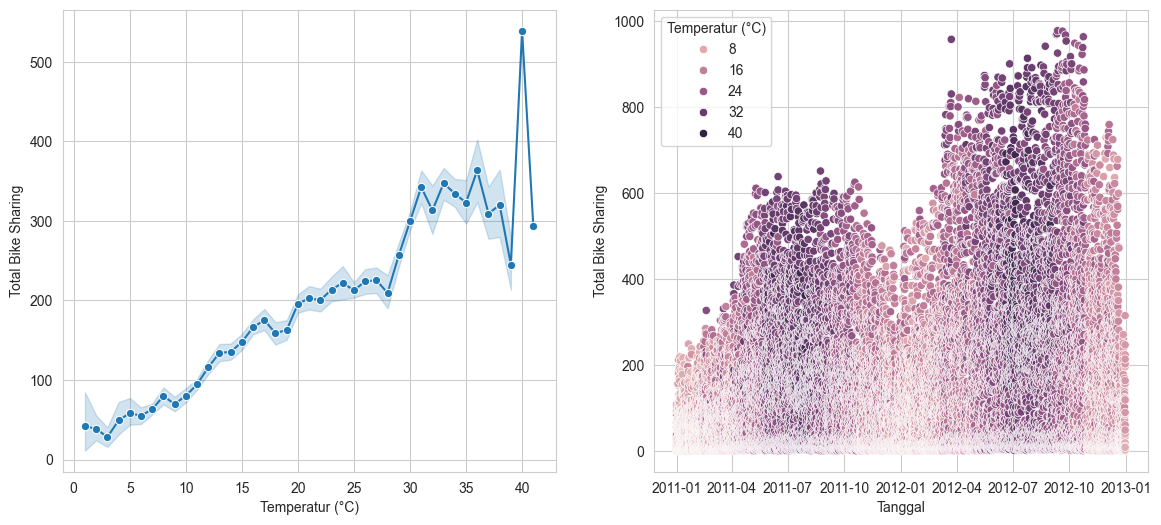

In [12]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(14)
fig.set_figheight(6)
sns.lineplot(data=hbike_df, x=hreal_temp, y='cnt', marker="o", ax=axs[0])
sns.scatterplot(data=hbike_df, x='dteday', y='cnt', hue=hreal_temp, ax=axs[1])
axs[0].set_xlabel('Temperatur (°C)')
axs[1].set_xlabel('Tanggal')
axs[0].set_ylabel('Total Bike Sharing')
axs[1].set_ylabel('Total Bike Sharing')
axs[1].legend(title='Temperatur (°C)')
plt.show()

### Explore Bike Sharing Daily

Melihat isi data dataframe dbike_df yang diringkas

In [13]:
dbike_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Menambahkan kolom deskripsi season sesuai dengan Readme.txt dari dataset yang disediakan, serta melakukan data analisis berdasarkan season yang dimana melihat jumlah pengguna bike sharing pada hari kerja serta melihat rata-rata pengguna bike sharing di setiap musim tersebut

In [14]:
season_desc = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
dbike_df['season_desc'] = dbike_df['season'].map(season_desc)
dbike_df.groupby(by="season_desc").agg({
    "workingday": "count",
    "cnt": ["max", "min", "mean"]
}).sort_values(by=("workingday", "count"), ascending=False)

workingday   cnt                   
                 count   max   min         mean
season_desc                                    
Fall               188  8714  1115  5644.303191
Summer             184  8362   795  4992.331522
Spring             181  7836   431  2604.132597
Winter             178  8555    22  4728.162921

Membuat variabel baru untuk menghitung temperatur yang sebenarnya berdasarkan readme.txt yang disediakan dalam dataset

In [15]:
dreal_temp = []
for x in dbike_df['temp']:
    dreal_temp.append(round(x * 41))

Sama halnya dengan grafik plot pada bike sharing hourly
Sebelah kiri dilakukannya pemetaan grafik lineplot yang dimana sumbu x merupakan temperatur suhu dalam celcius dan sumbu y merupakan total bika sharing per hari

Sedangkan pemetaan grafik scatterplot yang ada disebelah kanan, dilakukannya pemetaan dari sumbu x berdasarkan tanggal dan hari dari record bike sharing dataset, dan sumbu y berdasarkan total bike sharing per hari, yang dimana melakukan nantinya scatter akan berwarna sesuai dengan suhu temperatur saat itu warna oranye muda memiliki suhu terendah dalam record dataset yaitu 6, sedangkan warna violet memiliki suhu tertinggi dalam record dataset yaitu 30 derajat celcius

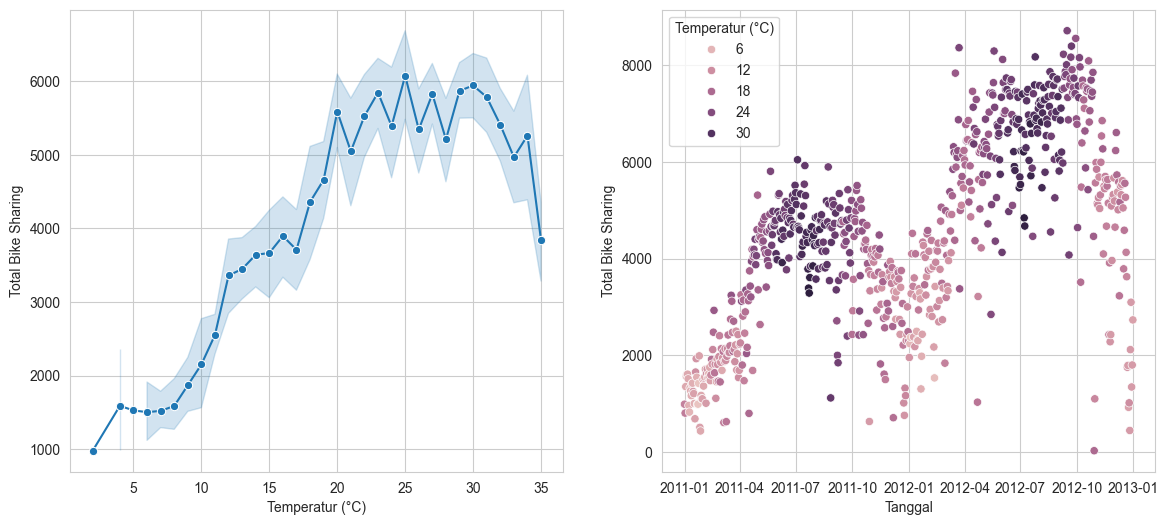

In [16]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(14)
fig.set_figheight(6)
sns.lineplot(data=dbike_df, x=dreal_temp, y='cnt', marker="o", ax=axs[0])
sns.scatterplot(data=dbike_df, x='dteday', y='cnt', hue=dreal_temp, ax=axs[1])
axs[0].set_xlabel('Temperatur (°C)')
axs[1].set_xlabel('Tanggal')
axs[0].set_ylabel('Total Bike Sharing')
axs[1].set_ylabel('Total Bike Sharing')
axs[1].legend(title='Temperatur (°C)')
plt.show()

### Explore All Data

Melihat isi data dataframe merge_bike_df yang diringkas

In [17]:
merge_bike_df.describe()

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Menambahkan kolom deskripsi season sesuai dengan Readme.txt dari dataset yang disediakan, serta melakukan data analisis berdasarkan season yang dimana melihat jumlah pengguna bike sharing pada hari kerja serta melihat rata-rata pengguna bike sharing di setiap musim tersebut

In [18]:
season_desc = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
merge_bike_df['season_desc_hour'] = merge_bike_df['season_hour'].map(season_desc)
merge_bike_df.groupby(by="season_desc_hour").agg({
    "workingday_hour": "count",
    "cnt_hour": ["max", "min", "mean"]
}).sort_values(by=("workingday_hour", "count"), ascending=False)

workingday_hour cnt_hour                
                           count      max min        mean
season_desc_hour                                         
Fall                        4496      977   1  236.016237
Summer                      4409      957   1  208.344069
Spring                      4242      801   1  111.114569
Winter                      4232      967   1  198.868856

Membuat variabel baru untuk menghitung temperatur yang sebenarnya berdasarkan readme.txt yang disediakan dalam dataset

In [19]:
merge_real_temp = []
for x in merge_bike_df['temp_hour']:
    merge_real_temp.append(round(x * 41))

Sama halnya dengan grafik plot pada kedua dataframe diatas
Sebelah kiri dilakukannya pemetaan grafik lineplot yang dimana sumbu x merupakan temperatur suhu dalam celcius dan sumbu y merupakan total bika sharing per jam

Sedangkan pemetaan grafik scatterplot yang ada disebelah kanan, dilakukannya pemetaan dari sumbu x berdasarkan tanggal dan hari dari record bike sharing dataset, dan sumbu y berdasarkan total bike sharing per hari, yang dimana melakukan nantinya scatter akan berwarna sesuai dengan suhu temperatur saat itu warna oranye muda memiliki suhu terendah dalam record dataset yaitu 8, sedangkan warna violet memiliki suhu tertinggi dalam record dataset yaitu 40 derajat celcius

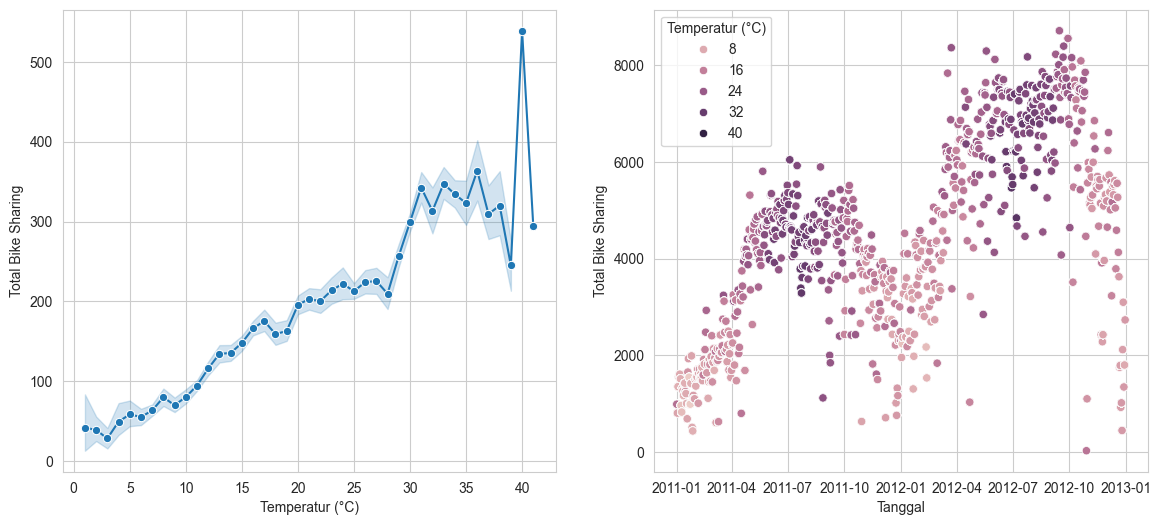

In [20]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(14)
fig.set_figheight(6)
sns.lineplot(data=merge_bike_df, x=merge_real_temp, y='cnt_hour', marker="o", ax=axs[0])
sns.scatterplot(data=merge_bike_df, x='dteday', y='cnt_day', hue=merge_real_temp, ax=axs[1])
axs[0].set_xlabel('Temperatur (°C)')
axs[1].set_xlabel('Tanggal')
axs[0].set_ylabel('Total Bike Sharing')
axs[1].set_ylabel('Total Bike Sharing')
axs[1].legend(title='Temperatur (°C)')
plt.show()

Menyimpan data yang digabungkan ke all_data.csv

In [21]:
merge_bike_df.to_csv("dashboard/main_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Di musim manakah penggunaan bike sharing per jam paling banyak digunakan?

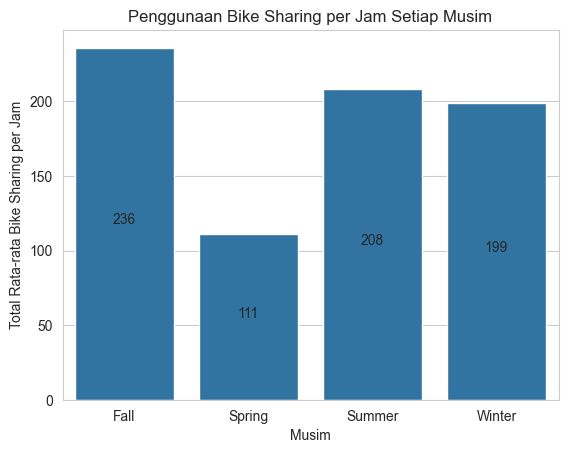

In [22]:
data_season = merge_bike_df.groupby('season_desc_hour')['cnt_hour'].mean()
nama_musim = ['Fall', 'Spring', 'Summer', 'Winter']

sns.barplot(x=nama_musim, y=data_season)
plt.xlabel('Musim')
for i in range(len(nama_musim)):
    plt.text(i, data_season.iloc[i]//2, round(data_season.iloc[i]), ha = 'center')
plt.ylabel('Total Rata-rata Bike Sharing per Jam')
plt.title('Penggunaan Bike Sharing per Jam Setiap Musim')
plt.show()

Berdasarkan grafik barplot diatas dapat dilihat penggunaan bike sharing per jam di musim Gugur (Fall) merupakan musim paling banyak pengguna menggunakan bike sharing per jam

### Pertanyaan 2: Apakah penggunaan bike sharing di tahun 2011 sampai Oktober 2012 dipengaruhi oleh temperatur?

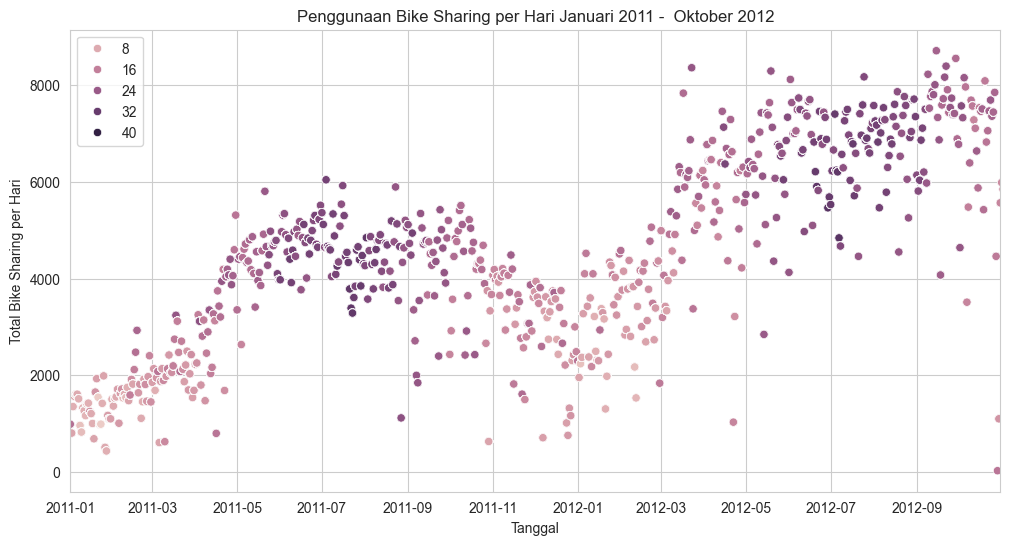

In [23]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=merge_bike_df, x='dteday', y='cnt_day', hue=merge_real_temp)
ax.set_xlim(merge_bike_df['dteday'].min(), datetime.datetime.strptime('2012-10-31', '%Y-%m-%d').date())
plt.xlabel('Tanggal')
plt.ylabel('Total Bike Sharing per Hari')
plt.title('Penggunaan Bike Sharing per Hari Januari 2011 -  Oktober 2012')
plt.show()

Berdasarkan scatterplot diatas dapat dilihat bahwa temperatur memiliki pengaruh terhadap penggunaan bike sharing harian, yang dimana temperatur yang lebih tinggi memiliki pengguna bike sharing per hari yang lebih tinggi daripada temperatur yang lebih rendah 

## Conclusion

- Conclusion pertanyaan 1, musim Gugur (Fall) merupakan musim yang paling banyak peminat pengguna bike sharing per jam, diikuti oleh musim Summer (Panas), musim Dingin (Winter), dan musim Semi (Spring) yang merupakan musim paling sedikit.
- Conclusion pertanyaan 2, penggunaan bike sharing dari Januari 2011 sampai Oktober 2012 per hari dipengaruhi oleh temperatur yang dimana temperatur yang tinggi cenderung memiliki dampak banyaknya pengguna bike sharing per hari, dibandingkan temperatur yang rendah cenderung memiliki dampak kurangnya pengguna bike sharing per hari.